<a href="https://colab.research.google.com/github/Manasa1224/Detection-of-Plant-Pathogen-using-AI/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting to Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Mount to the standard Google Drive directory in Colab

Mounted at /content/drive


# Imports and Constants:

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import load_model
import smtplib
import time

# Constant

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 256


# Dataset Preparation:

In [ ]:
def getDataset(dirc, IMG_SIZE, BATCH_SIZE):
    Dataset = tf.keras.preprocessing.image_dataset_from_directory(dirc, image_size=(IMG_SIZE, IMG_SIZE), seed=1, batch_size=BATCH_SIZE)
    return Dataset


# Loading Datasets

In [ ]:
trainDataset = getDataset('/content/drive/MyDrive/Plant disease/plant disease detection files/PLD_3_Classes_256/Training', IMG_SIZE, BATCH_SIZE)
validationDataset = getDataset('/content/drive/MyDrive/Plant disease/plant disease detection files/PLD_3_Classes_256/Validation', IMG_SIZE, BATCH_SIZE)
testDataset = getDataset('/content/drive/MyDrive/Plant disease/plant disease detection files/PLD_3_Classes_256/Testing', IMG_SIZE, BATCH_SIZE)


Found 3261 files belonging to 3 classes.
Found 416 files belonging to 3 classes.
Found 405 files belonging to 3 classes.


# Exploration of Dataset:

In [ ]:
class_names = trainDataset.class_names


# Printing Dataset Sizes

In [ ]:
print("train len:", len(trainDataset))
print("validation len:", len(validationDataset))
print("test len:", len(testDataset))


train len: 102
validation len: 13
test len: 13


# Visualization:

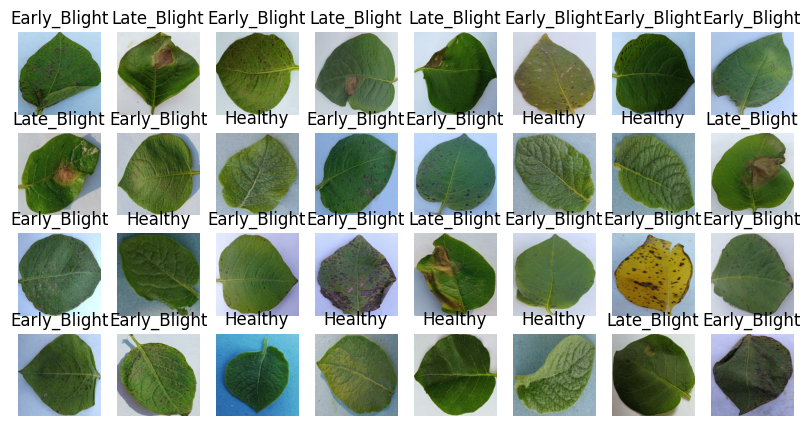

In [ ]:
fig = plt.figure(figsize=(10, 5))
for image, label in trainDataset.take(1):
    for i in range(32):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(np.array(image[i]).astype(np.uint8))
        plt.title(class_names[label[i]])
        plt.axis('off')


# Data Caching and Prefetching:

In [ ]:
trainDataset = trainDataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validationDataset = validationDataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testDataset = testDataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


# fData Preprocessing and Augmentation:

In [ ]:
resize_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
    tf.keras.layers.Rescaling(1.0/255.0)
])

randomFlip_randomRotation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])


# Model Building:

In [ ]:
model = models.Sequential([
    resize_rescale,
    randomFlip_randomRotation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model Summary:

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Model Compilation:

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [ ]:
history = model.fit(trainDataset, epochs=20, batch_size=BATCH_SIZE, verbose=1, validation_data=validationDataset)


Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 569s 6s/step - accuracy: 0.4411 - loss: 1.0252 - val_accuracy: 0.5769 - val_loss: 0.9255
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 515s 5s/step - accuracy: 0.5654 - loss: 0.9273 - val_accuracy: 0.6082 - val_loss: 0.8753
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 558s 5s/step - accuracy: 0.6428 - loss: 0.8149 - val_accuracy: 0.7139 - val_loss: 0.6439
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 556s 5s/step - accuracy: 0.7420 - loss: 0.6664 - val_accuracy: 0.7909 - val_loss: 0.5528
Epoch 5/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 507s 5s/step - accuracy: 0.8016 - loss: 0.4968 - val_accuracy: 0.8053 - val_loss: 0.5146
Epoch 6/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 564s 5s/step - accuracy: 0.8358 - loss: 0.4134 - val_accuracy: 0.8438 - val_loss: 0.4608
Epoch 7/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 558s 5s/step - accuracy: 0.8353 - loss: 0.4276 - val_accuracy: 0.9111 - val_loss: 0.2390
Epoch 8/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 500s 5s/step - accuracy: 0.9074 - loss: 0.2506 - val_accu

In [ ]:
score = model.evaluate(testDataset)


# Training History Visualization:

Text(0.5, 1.0, 'Training and Validation Loss')

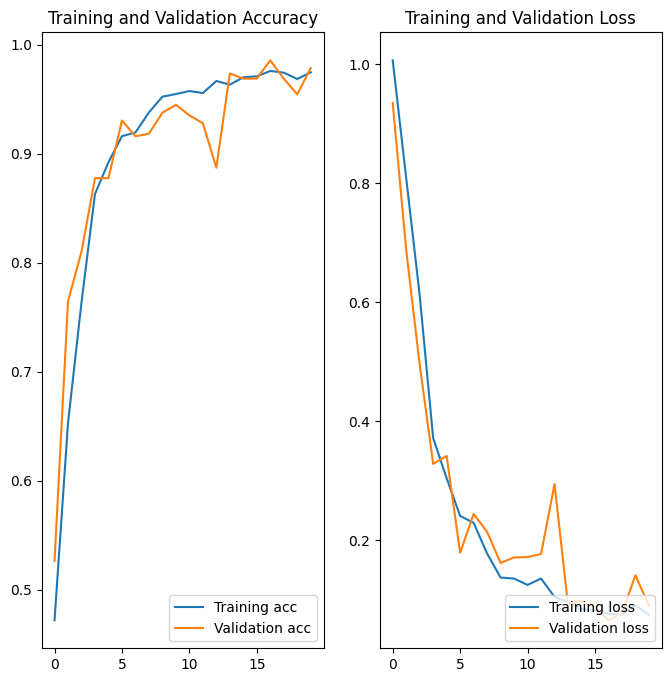

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), history.history['accuracy'], label="Training acc")
plt.plot(range(20), history.history['val_accuracy'], label="Validation acc")
plt.legend(loc="lower right")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), history.history['loss'], label="Training loss")
plt.plot(range(20), history.history['val_loss'], label="Validation loss")
plt.legend(loc="lower right")
plt.title('Training and Validation Loss')


# Prediction and Visualization:

predict image
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted label : Early_Blight


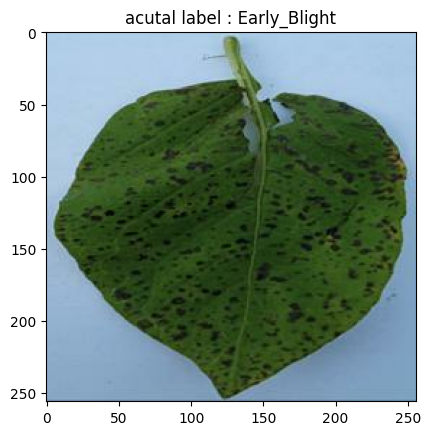

In [ ]:
for image, label in testDataset.take(1):
    f_image = image[0].numpy().astype('uint8')
    f_label = label[0].numpy()

    print("predict image")
    plt.imshow(f_image)
    plt.title("acutal label : "+str(class_names[f_label]))

    prediction = model.predict(image)
    print("predicted label :", class_names[np.argmax(prediction[0])])


In [ ]:
def predictImage(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions)), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


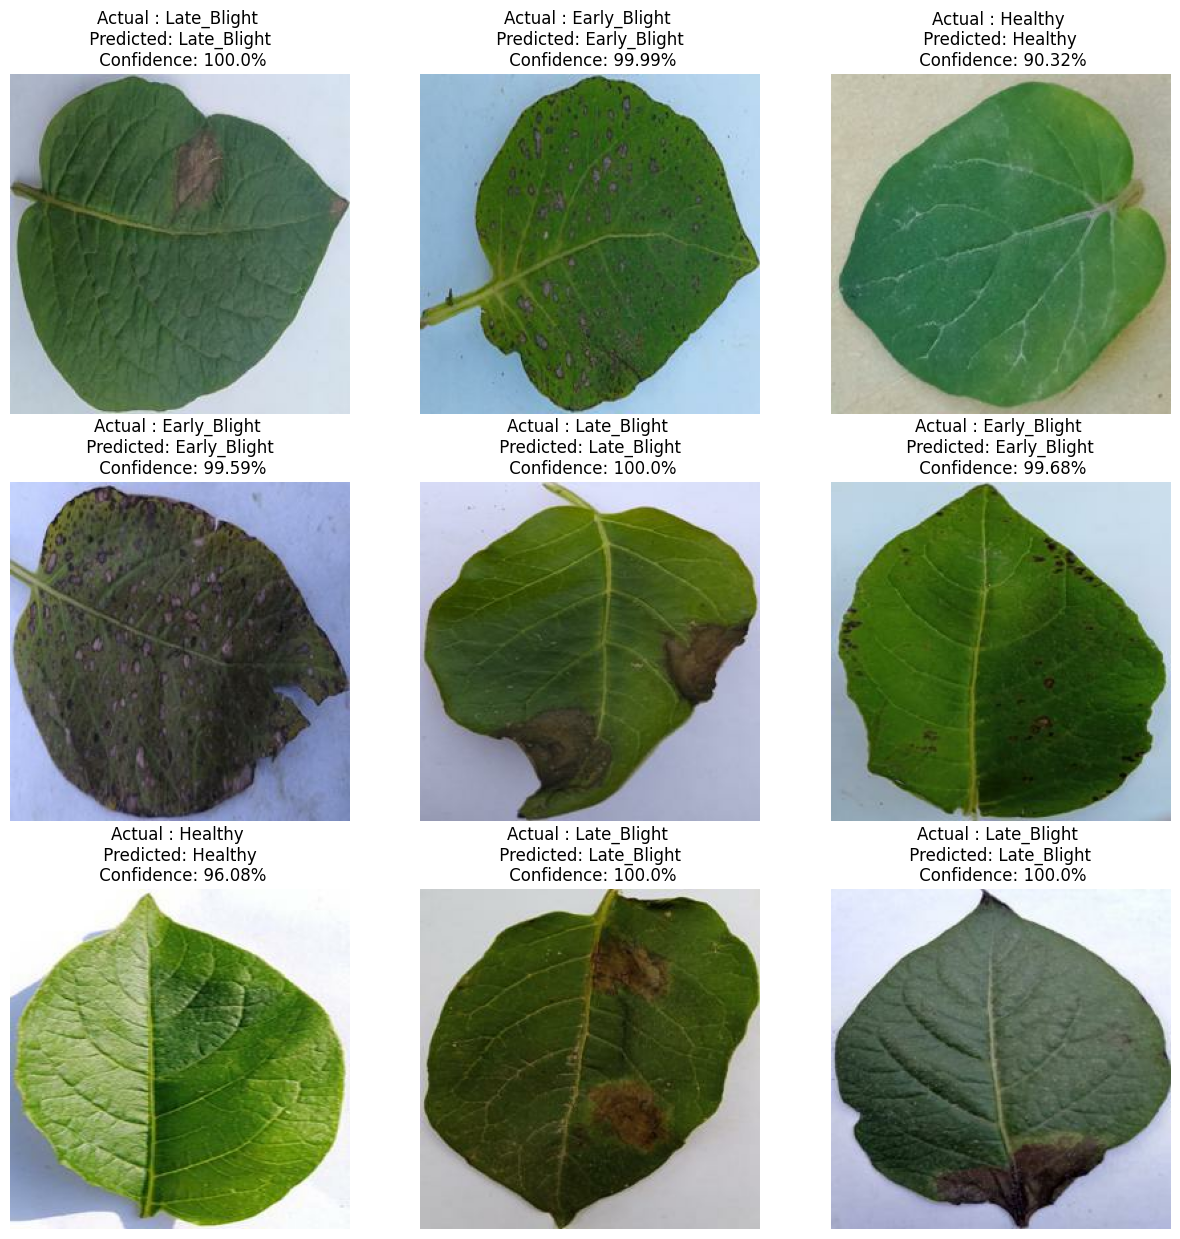

In [ ]:
plt.figure(figsize=(15, 15))
for image, label in testDataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        predicted_class, confidence = predictImage(model, image[i])
        actual_class = class_names[label[i]]
        plt.title(f"Actual : {actual_class} \n Predicted: {predicted_class} \n Confidence: {confidence}%")
        plt.axis('off')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Convert model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
model_tflite = converter.convert()


Saved artifact at '/tmp/tmpn5qw0q3n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  134827335399232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134827335399408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134827334987872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134827333470512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134827333475968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134827333476320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134827333468400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134827333868128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134827333864432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134827333869536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13482733387217

In [ ]:

open("cnnModel.tflite", "wb").write(model_tflite)


741148

In [ ]:
import time

def send_sms(phone_number, message):
    print('AT+CMGF=1')
    time.sleep(1)
    print(f'AT+CMGS="{phone_number}"')
    time.sleep(1)
    print(message)
    time.sleep(1)
    print('Ctrl+Z (End of message)')
    time.sleep(3)

phone_number = "9989208545"
message = "Warning: disease detected in crops. Immediate action required."

send_sms(phone_number, message)

AT+CMGF=1
AT+CMGS="9989208545"
Ctrl+Z (End of message)
